# Seaborn Plotting Data-Viz Jamboree

_Adam Struck and Ariel Balter_

## Python seaborn package
* Comparable to R's ggplot2
* Magic methods for data visualization
* Wrapper (built on top of) matplotlib
* Rapid access to the typical kinds of plots used in data exploration
* Base plots have good aesthetics
* Because seaborn methods return matplotlib objects, you can fine tune appearance etc.

## Let's get started!

## Import python libraries

In [1]:
# Tell Jupyter you want the plots to show up in the notebook
%matplotlib inline
# NumPy is the main package for numerical/mathematical data structures and functions
import numpy as np 
# pandas is the current leading package for tabular data analysis
# Contains data structures and methods similar to R's data.frame, data.table, and dplyr
import pandas as pd
# matplotlib is the base python plotting package
import matplotlib as mpl
# pyplot has the base plotting objets
import matplotlib.pyplot as plt
# seaborn is built on top of matplotlib
import seaborn as sns

## Get the data

In [2]:
heart = pd.read_csv("http://faculty.washington.edu/kenrice/heartgraphs/nhaneslarge.csv", sep=",", na_values=".")

## Take a quick look

### First 10 rows

In [3]:
heart.head(10)

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
0,108.000000,56.000000,56.0,58.0,Other,Male,434,1,25.83,65
1,117.333333,60.000000,56.0,64.0,Hispanic,Male,241,1,25.73,74
2,120.000000,82.666667,80.0,86.0,White non-Hispanic,Male,380,1,24.49,54
3,88.000000,52.000000,52.0,NaN,White non-Hispanic,Female,152,2,20.76,9
4,150.666667,96.000000,100.0,94.0,Black non-Hispanic,Male,422,1,24.63,49
5,99.000000,62.000000,66.0,62.0,White non-Hispanic,Male,319,1,21.35,69
6,107.000000,57.000000,54.0,NaN,White non-Hispanic,Female,1072,2,24.20,25
7,114.666667,58.000000,58.0,60.0,White non-Hispanic,Female,821,2,20.81,29
8,104.666667,72.000000,70.0,70.0,White non-Hispanic,Female,435,2,20.06,19
9,101.000000,58.000000,66.0,56.0,White non-Hispanic,Female,231,2,23.83,13


### Summary statistics

In [4]:
heart.describe()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
count,1000.000000,1000.000000,905.000000,832.000000,1000.0000,1000.00000,991.000000,1000.000000
mean,119.932667,68.021000,68.333702,68.442308,409.2650,1.50000,27.077619,40.109000
std,17.996055,13.951905,14.371156,14.041936,242.0019,0.50025,6.552778,20.379363
min,82.000000,0.000000,0.000000,0.000000,0.0000,1.00000,14.240000,8.000000
25%,108.000000,60.000000,60.000000,60.000000,250.0000,1.00000,22.520000,21.750000
50%,117.333333,69.000000,68.000000,70.000000,354.0000,1.50000,26.550000,40.000000
75%,130.000000,77.000000,78.000000,78.000000,492.2500,2.00000,30.860000,54.000000
max,216.000000,112.000000,110.000000,114.000000,1906.0000,2.00000,57.410000,85.000000


#### Look how smart pandas is. It knows it can only do stats on numerical columns.

# Univariate Plots: Folate intake by gender

## Experiment with histsograms

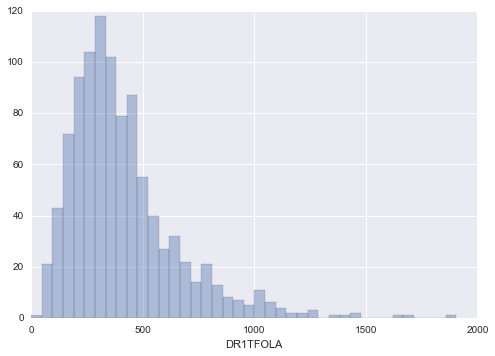

In [5]:
sns.distplot(heart["DR1TFOLA"], kde=False)

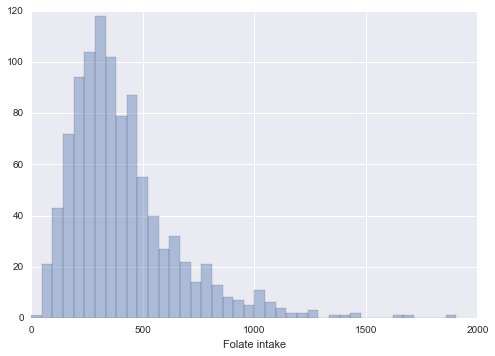

In [6]:
sns.distplot(heart["DR1TFOLA"], kde=False)\
   .set(xlabel='Folate intake')


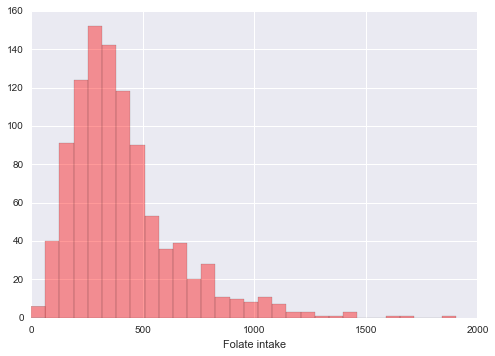

In [33]:
sns.distplot(heart["DR1TFOLA"],
             kde=False, bins=30,
             color='r'
            )\
   .set(xlabel='Folate intake')

[(0, 2500.0), <matplotlib.text.Text at 0x11bab72b0>]

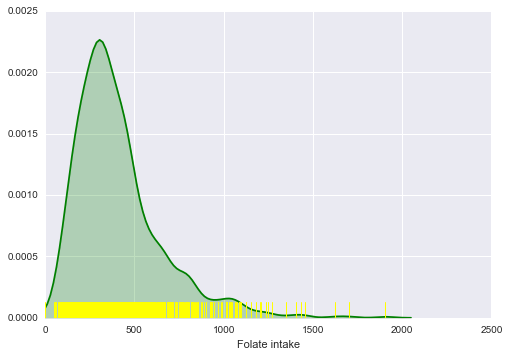

In [8]:
sns.distplot(heart["DR1TFOLA"], kde=True, hist=False, rug=True,
             kde_kws={"shade": True, "color": "green"},
             rug_kws={"color": "yellow"})\
   .set(xlabel='Folate intake', xlim=(0,None))

### Facet by gender

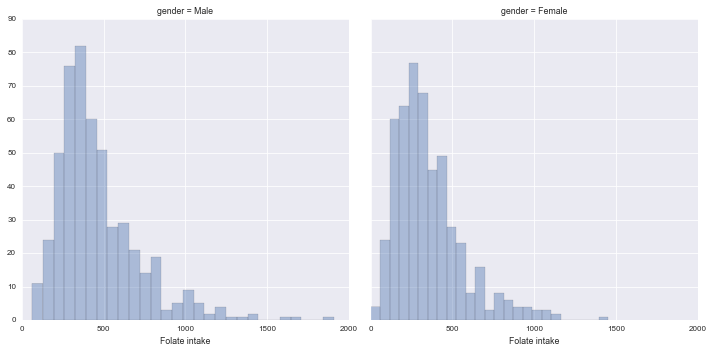

In [62]:
sns.FacetGrid(heart,
    col="gender",
    margin_titles=True,
    size=5,
    aspect=1,
    )\
   .map(sns.distplot, "DR1TFOLA", kde=False)\
   .set(xlabel='Folate intake')

### Kernel density

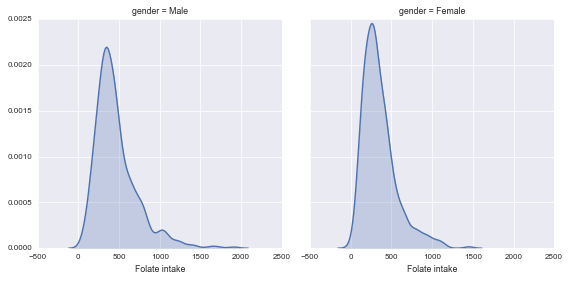

In [54]:
sns.FacetGrid(heart,
    col="gender",
    margin_titles=True,
    size=4,
    aspect=1
    )\
   .map(sns.distplot, "DR1TFOLA", kde=True, hist=False, kde_kws={"shade": True})\
   .set(xlabel='Folate intake')

### Kernel density&mdash;color by gender

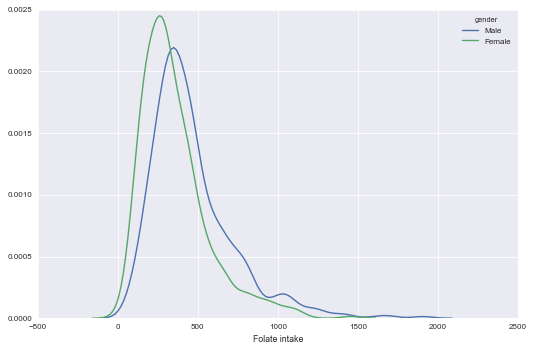

In [112]:
sns.FacetGrid(heart,
    hue="gender",
    margin_titles=True,
    size=5, aspect=1.5,
    legend_out=False
    )\
   .map(sns.distplot,
        "DR1TFOLA",
        kde=True,
        hist=False,
        kde_kws={"shade": False}
        )\
   .set(xlabel='Folate intake')\
   .add_legend()

# Univariate Plots: Systolic blood pressure by gender

## Strip Charts

### Basic strip chart

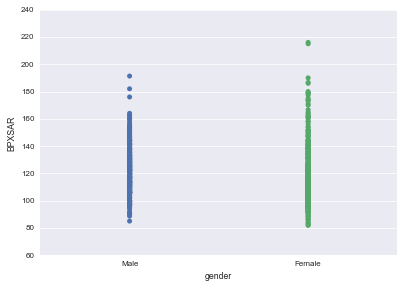

In [86]:
sns.stripplot(x="gender", y="BPXSAR", data=heart)

### Density obscured&mdash;add alpha

[<matplotlib.text.Text at 0x12bf84160>, <matplotlib.text.Text at 0x12bde6ac8>]

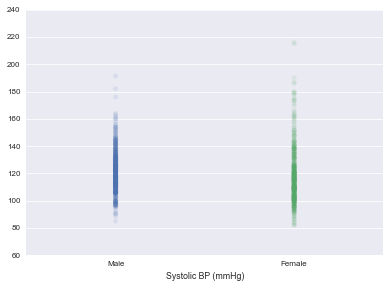

In [87]:
sns.stripplot(x="gender", y="BPXSAR", data=heart, alpha=0.1)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

### Spread out the dots using "jitter"

[<matplotlib.text.Text at 0x12bf8cf98>, <matplotlib.text.Text at 0x12c042898>]

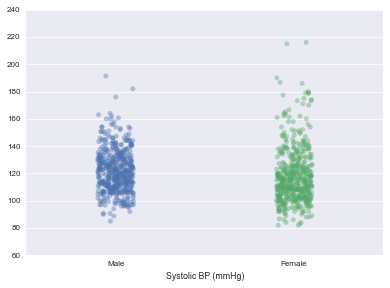

In [88]:
sns.stripplot(x="gender", y="BPXSAR", data=heart, jitter=True, alpha = 0.4)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

## Beeswarm

[<matplotlib.text.Text at 0x12c061cc0>, <matplotlib.text.Text at 0x12bf8cfd0>]

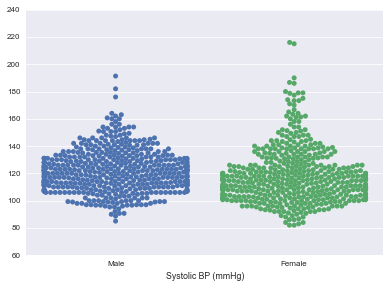

In [89]:
sns.swarmplot(x="gender", y="BPXSAR", data=heart)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

### Add alpha

[<matplotlib.text.Text at 0x126799e80>, <matplotlib.text.Text at 0x10c018828>]

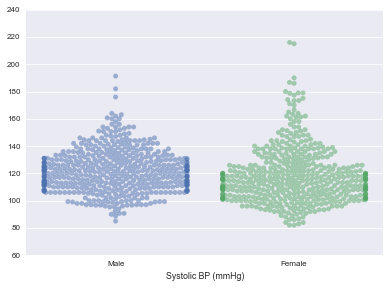

In [115]:
sns.swarmplot(x="gender", y="BPXSAR", data=heart, alpha=0.5)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

### Overlay violin plot

[<matplotlib.text.Text at 0x12d696048>, <matplotlib.text.Text at 0x12d5c9358>]

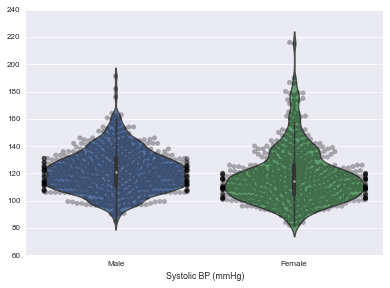

In [99]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, bw=0.2)
sns.swarmplot(x="gender", y="BPXSAR", data=heart, color="black", alpha=0.3)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

[<matplotlib.text.Text at 0x12c5d8eb8>, <matplotlib.text.Text at 0x12c2d2f60>]

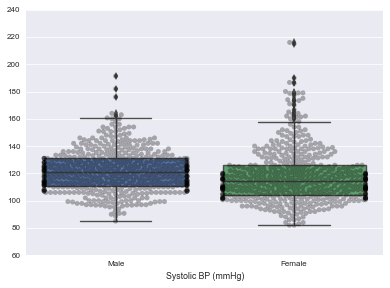

In [93]:
sns.boxplot(x="gender", y="BPXSAR", data=heart)
sns.swarmplot(x="gender", y="BPXSAR", data=heart, color="black", alpha=0.3)\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

[<matplotlib.text.Text at 0x12c5c3e80>, <matplotlib.text.Text at 0x12c5baf28>]

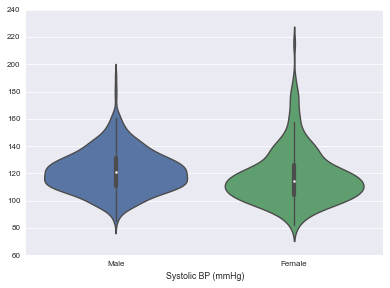

In [94]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, inner="box")\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

[<matplotlib.text.Text at 0x12d1d6828>, <matplotlib.text.Text at 0x12d186c88>]

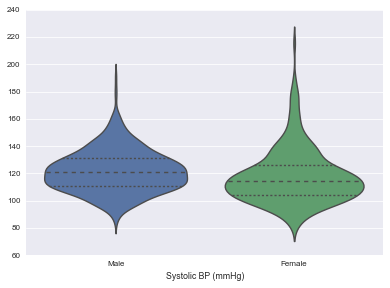

In [95]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, inner="quartile")\
   .set(xlabel="Systolic BP (mmHg)", ylabel="")

[<matplotlib.text.Text at 0x12d1d6fd0>, <matplotlib.text.Text at 0x12d1e5550>]

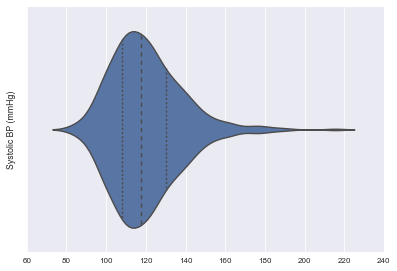

In [96]:
sns.violinplot(x="BPXSAR", data=heart, inner="quartile")\
   .set(ylabel="Systolic BP (mmHg)", xlabel="")

# Bivariate Plots: Age & Systolic Blood Pressure

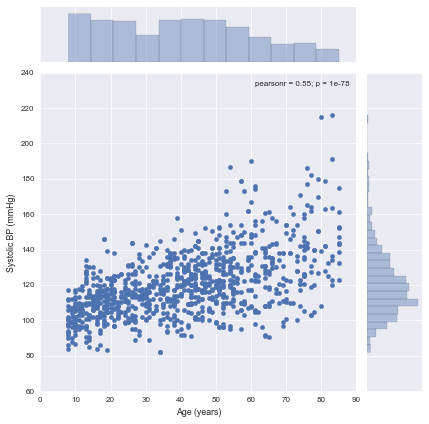

In [104]:
sns.jointplot(x="RIDAGEYR", y="BPXSAR", data=heart, kind="scatter")\
   .set_axis_labels("Age (years)", "Systolic BP (mmHg)")

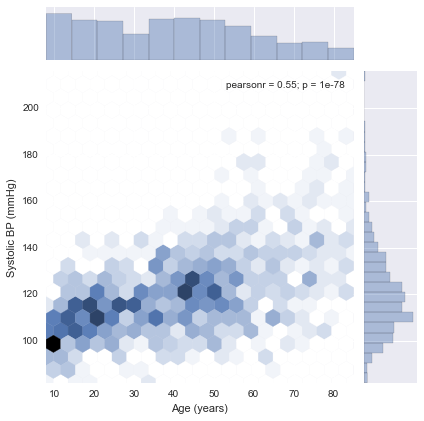

In [22]:
sns.jointplot(x="RIDAGEYR", y="BPXSAR", data=heart, kind="hex").\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

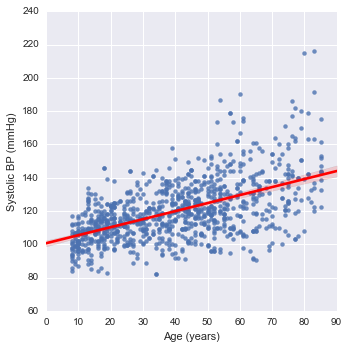

In [23]:
sns.lmplot(x="RIDAGEYR", y="BPXSAR", data=heart, line_kws={'color': 'red'}, ci=95).\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

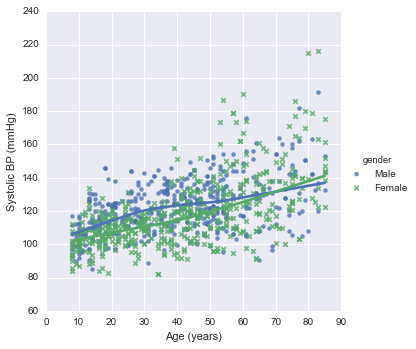

In [24]:
sns.lmplot(x="RIDAGEYR", y="BPXSAR", data=heart, hue="gender", markers=["o", "x"], x_ci=95, lowess=True).\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

# Multivariable Plots: Body Mass Index & Systolic BP, by gender and age

Let's bin the data

In [25]:
heart = heart.assign(age_cat = pd.cut(heart['RIDAGEYR'],[0,30,55,100]).astype('category'))
heart.head()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR,age_cat
0,108.000000,56.000000,56.0,58.0,Other,Male,434,1,25.83,65,"(55, 100]"
1,117.333333,60.000000,56.0,64.0,Hispanic,Male,241,1,25.73,74,"(55, 100]"
2,120.000000,82.666667,80.0,86.0,White non-Hispanic,Male,380,1,24.49,54,"(30, 55]"
3,88.000000,52.000000,52.0,NaN,White non-Hispanic,Female,152,2,20.76,9,"(0, 30]"
4,150.666667,96.000000,100.0,94.0,Black non-Hispanic,Male,422,1,24.63,49,"(30, 55]"


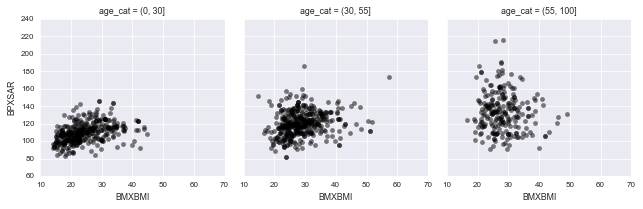

In [108]:
sns.FacetGrid(heart, col="age_cat", margin_titles=True)\
   .map(plt.scatter, "BMXBMI", "BPXSAR", color="black", alpha=0.5)

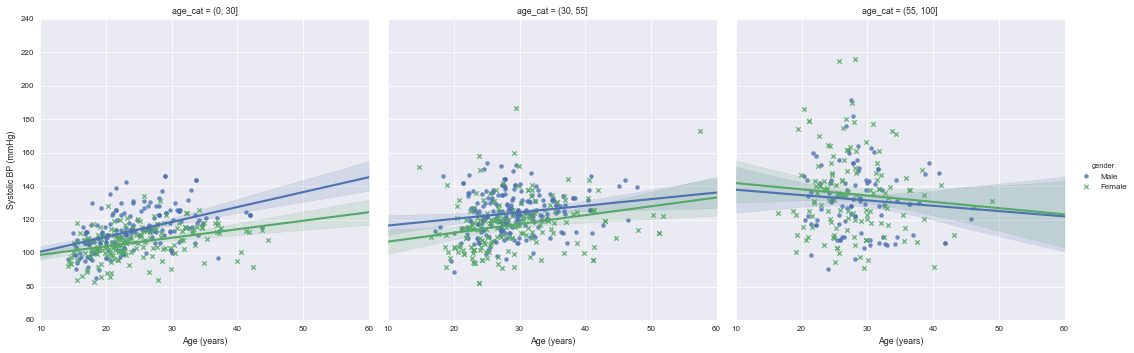

In [107]:
sns.lmplot(x="BMXBMI", y="BPXSAR", data=heart, col="age_cat", hue="gender", markers=["o", "x"], ci=95)\
   .set_axis_labels("Age (years)", "Systolic BP (mmHg)")

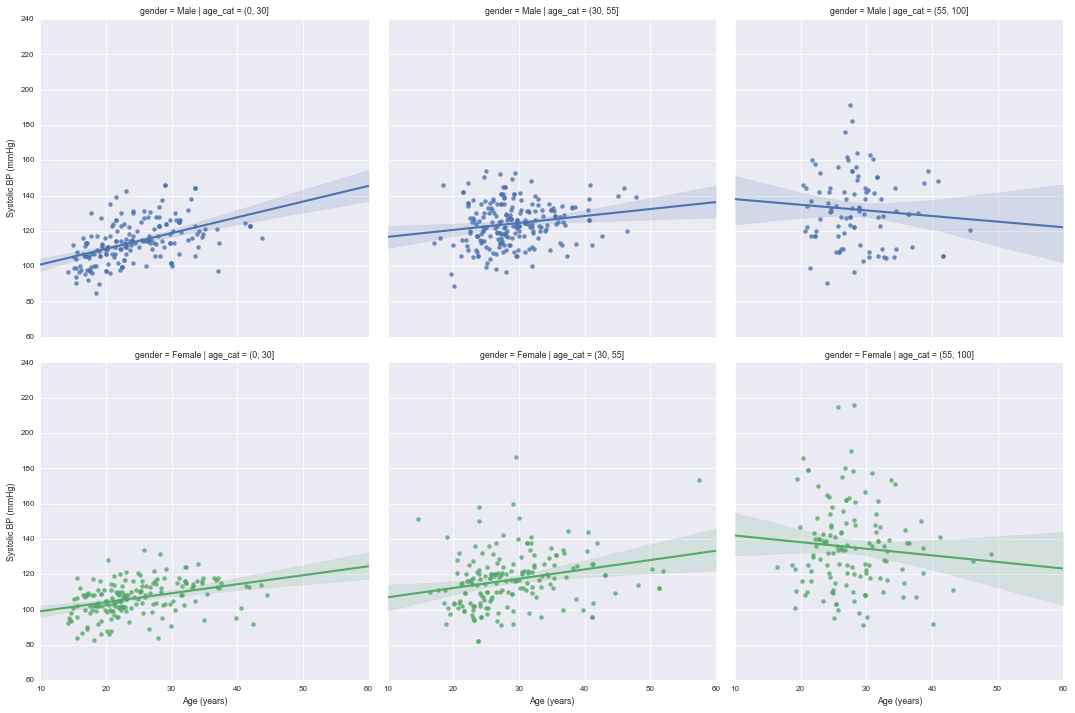

In [109]:
sns.lmplot(x="BMXBMI", y="BPXSAR", data=heart, col="age_cat", row="gender", hue="gender", ci=95)\
   .set_axis_labels("Age (years)", "Systolic BP (mmHg)")